In [75]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


In [76]:
# Set random seed for reproducibility
# np.random.seed(42)

In [77]:
# Parameters
N = 100  # number of nodes
alpha = 1.0  # decay rate
beta = 1.0  # interaction strength
dt = 0.01  # time step
steps = 20000  # total steps
gamma = 3  # power law exponent

In [78]:
# Create scale-free network
def create_scale_free_network():
    # Using Barabási-Albert model which creates networks with gamma ≈ 3
    m = 2  # number of edges to attach from a new node to existing nodes
    G = nx.barabasi_albert_graph(N, m)
    return nx.adjacency_matrix(G).toarray()

In [79]:
# Initialize adjacency matrix
A = create_scale_free_network()

# Initialize state vector x
x = np.zeros(N)
# Set last 10 nodes to random values between 0 and 0.1
x[90:] = np.random.uniform(0, 1, 10) / 10

# Store history for plotting
x_history = np.zeros((steps + 1, N))
x_history[0] = x

In [80]:
# Simulation using Euler method
def simulate_step(x, A, alpha, beta, dt):
    # Calculate sum of Aij*xj for each i
    interaction_term = np.dot(A, x)
    
    # Calculate dx/dt for each node
    dxdt = -alpha * x + beta * (1 - x) * interaction_term
    
    # Euler step
    x_new = x + dt * dxdt
    
    # Ensure values stay in [0, 1]
    x_new = np.clip(x_new, 0, 1)
    
    return x_new

In [81]:
# Run simulation
for t in range(steps):
    x = simulate_step(x, A, alpha, beta, dt)
    x_history[t + 1] = x

In [82]:
# Create time array
time = np.arange(0, (steps + 1) * dt, dt)

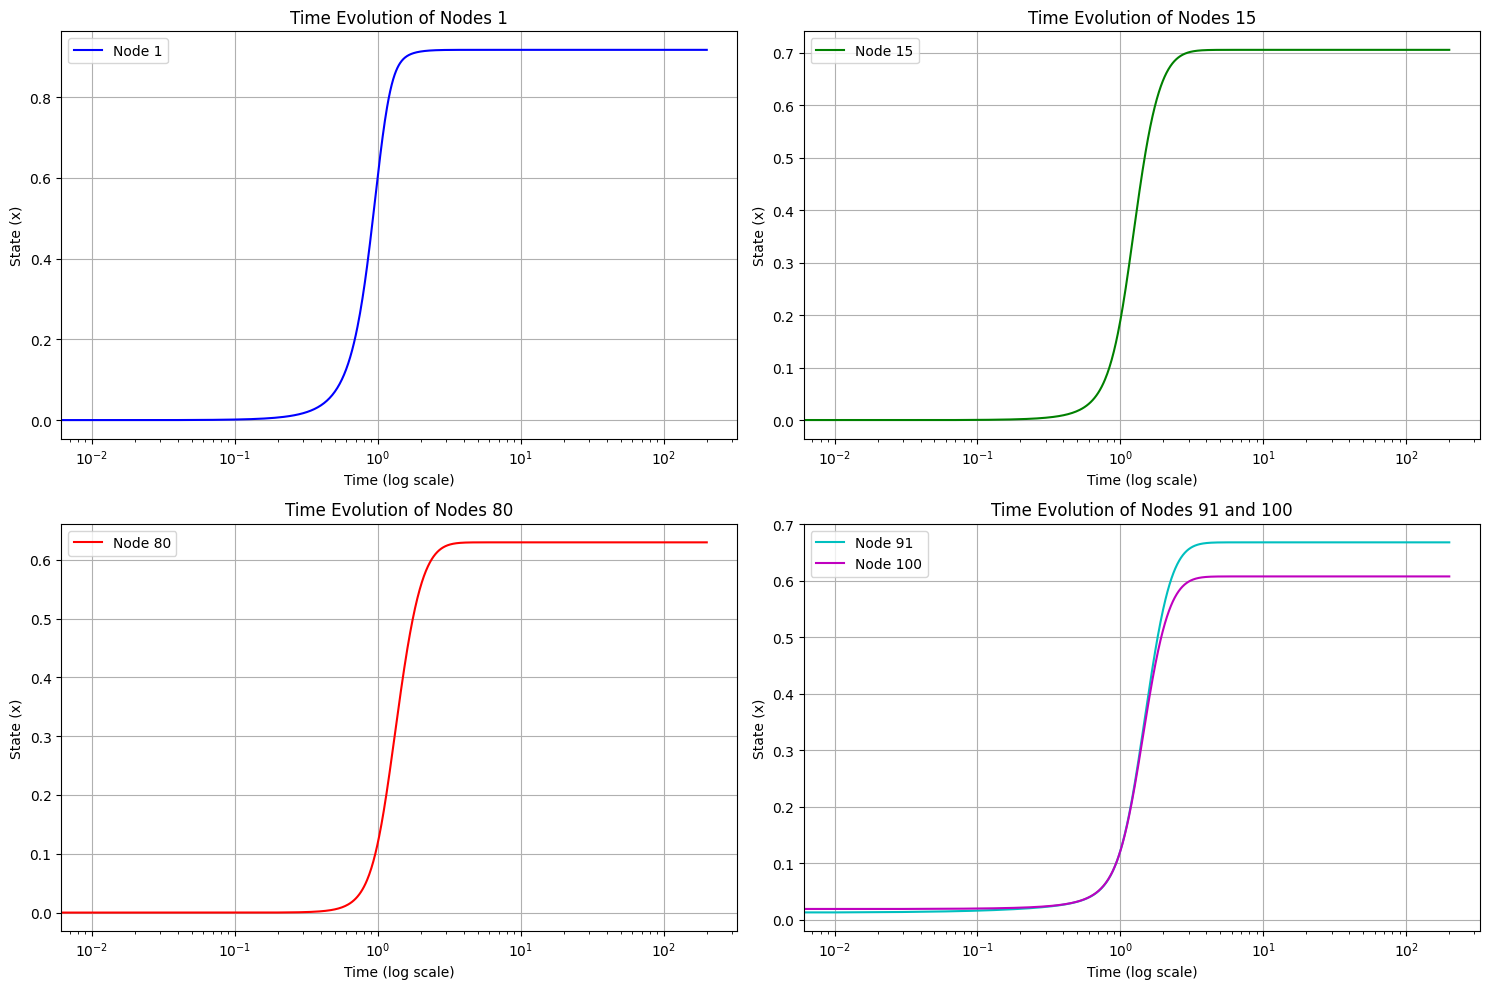

In [83]:
# Plotting
plt.figure(figsize=(15, 10))

# Plot for nodes 1, 15, 80
plt.subplot(2,2,1)
plt.semilogx(time, x_history[:, 0], 'b-', label='Node 1')
plt.xlabel('Time (log scale)')
plt.ylabel('State (x)')
plt.title('Time Evolution of Nodes 1')
plt.grid(True)
plt.legend()

plt.subplot(2,2,2)
plt.semilogx(time, x_history[:, 14], 'g-', label='Node 15')
plt.xlabel('Time (log scale)')
plt.ylabel('State (x)')
plt.title('Time Evolution of Nodes 15')
plt.grid(True)
plt.legend()

plt.subplot(2,2,3)
plt.semilogx(time, x_history[:, 79], 'r-', label='Node 80')
plt.xlabel('Time (log scale)')
plt.ylabel('State (x)')
plt.title('Time Evolution of Nodes 80')
plt.grid(True)
plt.legend()

plt.subplot(2,2,4)
plt.semilogx(time, x_history[:, 90], 'c-', label='Node 91')
plt.semilogx(time, x_history[:, 99], 'm-', label='Node 100')
plt.xlabel('Time (log scale)')
plt.ylabel('State (x)')
plt.title('Time Evolution of Nodes 91 and 100')
plt.grid(True)
plt.legend()

plt.tight_layout()